<a href="https://colab.research.google.com/github/akash1331123/Python_Exploratory_Data_Analysis/blob/main/Dairy_Industry_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do you know how much the dairy industry has grown in our country and how many companies are there in the industry? we have user different product everyday? but we don't know what is the self life of each product and what condition should it be kept? Which state produces the most dairy products and which brand is the largest produces in our country ? This dairy dataset can help you explore those questions!**
# **This dataset contains location from different states, total land area, number of cows, Farm Size,	Date,	Product ID,	Product Name,	Brand	Quantity (liters/kg),	Price per Unit,	Total Value,	Shelf Life (days),	Storage Condition,	Production Date,	Expiration Date,	Quantity Sold (liters/kg),	Price per Unit (sold),	Approx. Total Revenue(INR),	Customer Location,	Sales Channel,	Quantity in Stock (liters/kg),	Minimum Stock Threshold (liters/kg),	Reorder Quantity (liters/kg).**
# **Explore and analyze the data to discover important facts about dairy industries.**

# **the project contain the dataset of dairy industry should be contribution of different farm size and self life of each dairy product storage condition is impact on each product and Customer preferences and buying behavior and all the other thinks to explain the exploratory data analysis with python to get comprehension from the data**


# Import Packages

**First Import the necessary library package**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the csv file of Dairy Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dairy df/dairy_dataset.csv")

# **Data Preparation**

In [ ]:
#Print Dataset
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2/17/2022,5,Ice Cream,Dodla Dairy,222.40,85.72,...,12/27/2021,1/21/2022,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,12/1/2021,1,Milk,Amul,687.48,42.61,...,10/3/2021,10/25/2021,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2/28/2022,4,Yogurt,Dodla Dairy,503.48,36.50,...,1/14/2022,2/13/2022,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,6/9/2019,3,Cheese,Britannia Industries,823.36,26.52,...,5/15/2019,7/26/2019,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,12/14/2020,8,Buttermilk,Mother Dairy,147.77,83.85,...,10/17/2020,10/28/2020,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [ ]:
# Check shape of Dataset
df.shape

(4325, 23)

In [ ]:
# All Column Name
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [ ]:
# To Check all Column DataType
df.dtypes

Location                                object
Total Land Area (acres)                float64
Number of Cows                           int64
Farm Size                               object
Date                                    object
Product ID                               int64
Product Name                            object
Brand                                   object
Quantity (liters/kg)                   float64
Price per Unit                         float64
Total Value                            float64
Shelf Life (days)                        int64
Storage Condition                       object
Production Date                         object
Expiration Date                         object
Quantity Sold (liters/kg)                int64
Price per Unit (sold)                  float64
Approx. Total Revenue(INR)             float64
Customer Location                       object
Sales Channel                           object
Quantity in Stock (liters/kg)            int64
Minimum Stock

In [ ]:
# To Check overall Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

# Date, Producton Year, Expiration Year to convert Date time format

In [ ]:
# Convert Date Time Format
df['Date'] = pd.to_datetime(df['Date'])
df['Production Date'] = pd.to_datetime(df['Production Date'])
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])

In [ ]:
# Featch Year Column
df['Year'] = df['Date'].dt.year
df['Production Year'] = df['Production Date'].dt.year
df['Expiration Year'] = df['Expiration Date'].dt.year
df['Month'] = df['Date'].dt.month


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

In [ ]:
# Statistical Value Of the Dataset
df.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year,Production Year,Expiration Year,Month
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820,2020.466358,2020.377572,2020.459653,6.465434
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035,1.113822,1.147981,1.146144,3.472906
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000,2019.000000,2018.000000,2018.000000,1.000000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000,2019.000000,2019.000000,2019.000000,3.000000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000,2020.000000,2020.000000,2020.000000,6.000000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000,2021.000000,2021.000000,2021.000000,9.000000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000,2022.000000,2022.000000,2023.000000,12.000000


In [ ]:
# Count Number Of Rows of The Dataset
df.count()

Location                               4325
Total Land Area (acres)                4325
Number of Cows                         4325
Farm Size                              4325
Date                                   4325
Product ID                             4325
Product Name                           4325
Brand                                  4325
Quantity (liters/kg)                   4325
Price per Unit                         4325
Total Value                            4325
Shelf Life (days)                      4325
Storage Condition                      4325
Production Date                        4325
Expiration Date                        4325
Quantity Sold (liters/kg)              4325
Price per Unit (sold)                  4325
Approx. Total Revenue(INR)             4325
Customer Location                      4325
Sales Channel                          4325
Quantity in Stock (liters/kg)          4325
Minimum Stock Threshold (liters/kg)    4325
Reorder Quantity (liters/kg)    

In [ ]:
# Total Number Of Dupicate Row Present In the Dataset
Duplicate_Row = df[df.duplicated()]
print('Duplicate_Row: ',Duplicate_Row)

Duplicate_Row:  Empty DataFrame
Columns: [Location, Total Land Area (acres), Number of Cows, Farm Size, Date, Product ID, Product Name, Brand, Quantity (liters/kg), Price per Unit, Total Value, Shelf Life (days), Storage Condition, Production Date, Expiration Date, Quantity Sold (liters/kg), Price per Unit (sold), Approx. Total Revenue(INR), Customer Location, Sales Channel, Quantity in Stock (liters/kg), Minimum Stock Threshold (liters/kg), Reorder Quantity (liters/kg), Year, Production Year, Expiration Year, Month]
Index: []

[0 rows x 27 columns]


**There is no duplicate row present in the dataset**

## **Data Preprocessing and Cleaning**

**Now there are no null values in the data set as can be seen in the below code**

In [ ]:
# Checking The Null Value Of Each Columns
df.isnull().sum()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
Year                                   0
Production Year 

In [ ]:
# Datect the Correlation
df.corr()

<ipython-input-95-62611dd70a59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year,Production Year,Expiration Year,Month
Total Land Area (acres),1.000000,-0.009594,-0.007625,-0.001347,0.016962,0.005465,0.001420,-0.036948,0.013565,-0.015278,0.034161,0.010940,0.013727,-0.013386,-0.012973,-0.011750,-0.037454
Number of Cows,-0.009594,1.000000,0.010013,-0.004254,-0.006305,-0.009648,0.008068,0.010915,-0.006916,0.003461,-0.016088,0.002971,0.028728,-0.001923,0.001676,0.000079,0.018449
Product ID,-0.007625,0.010013,1.000000,-0.027615,0.002351,-0.014582,0.202143,-0.021157,0.000731,-0.013642,-0.015158,-0.004781,-0.002916,-0.024529,-0.022687,-0.008309,0.001878
Quantity (liters/kg),-0.001347,-0.004254,-0.027615,1.000000,-0.009435,0.724271,-0.006464,0.642613,-0.008217,0.516351,0.668622,-0.010437,0.003137,0.007276,0.007114,0.008362,-0.007514
Price per Unit,0.016962,-0.006305,0.002351,-0.009435,1.000000,0.589694,0.001463,-0.002010,0.993908,0.437296,-0.010231,0.012188,0.007884,0.019576,0.012472,0.017200,-0.009700
Total Value,0.005465,-0.009648,-0.014582,0.724271,0.589694,1.000000,-0.007832,0.467164,0.587408,0.722016,0.482579,0.007829,0.002148,0.020139,0.014372,0.018698,-0.017695
Shelf Life (days),0.001420,0.008068,0.202143,-0.006464,0.001463,-0.007832,1.000000,-0.001814,0.000156,-0.008105,-0.006592,-0.012949,-0.020754,-0.005710,-0.007689,0.067430,0.007968
Quantity Sold (liters/kg),-0.036948,0.010915,-0.021157,0.642613,-0.002010,0.467164,-0.001814,1.000000,-0.001789,0.809062,-0.140076,-0.008755,0.006344,-0.004653,-0.006319,-0.009563,-0.002760
Price per Unit (sold),0.013565,-0.006916,0.000731,-0.008217,0.993908,0.587408,0.000156,-0.001789,1.000000,0.440795,-0.008874,0.013941,0.005610,0.019421,0.012775,0.016823,-0.008960
Approx. Total Revenue(INR),-0.015278,0.003461,-0.013642,0.516351,0.437296,0.722016,-0.008105,0.809062,0.440795,1.000000,-0.117933,0.000206,-0.000698,0.001811,-0.004274,-0.005110,-0.012474


# **Exploratory Data Analysis**
**After dealing with the Data Preparation and Cleaning now coming to our problem statement. Here we will ask some questions from the data set and based on answers we will figure out the important facts about dairy industries..**

# Que1 = What are the total sales of each state ?

<Axes: xlabel='Location'>

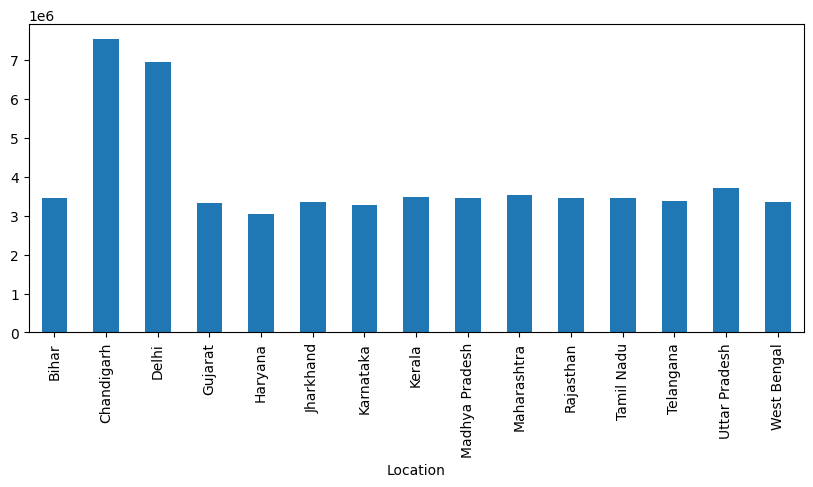

In [ ]:
plt.figure(figsize=(10, 4))
df.groupby(['Location'])['Approx. Total Revenue(INR)'].sum().plot(kind='bar')

**From above Graphs we can see that the total sales from Different States Record Maximum Sales is *Chadighar* and Delhi**

# Que 2 = What is the contribution of each farm size ?

<Axes: xlabel='count', ylabel='Farm Size'>

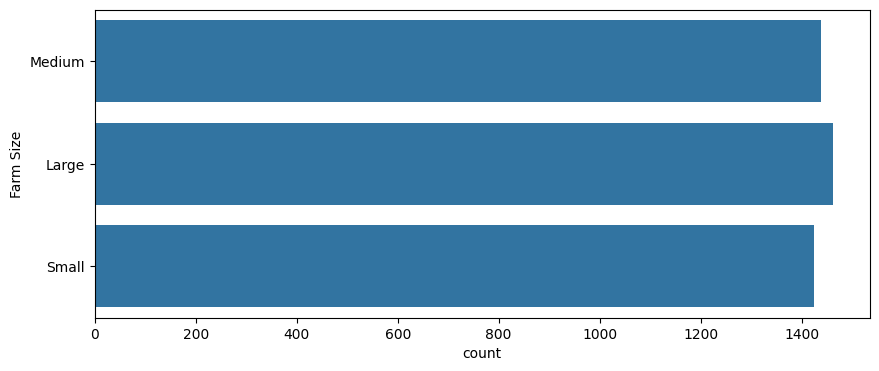

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(df['Farm Size'])

<Axes: ylabel='Farm Size'>

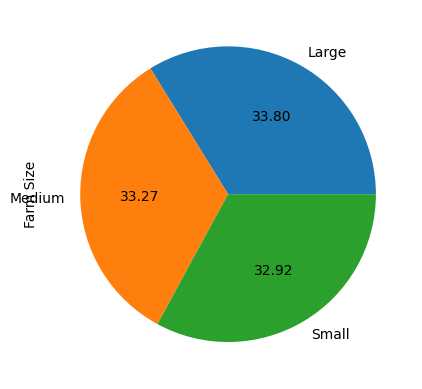

In [ ]:
df['Farm Size'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
df.groupby(['Farm Size'],as_index=False)['Number of Cows','Quantity (liters/kg)'].sum()

<ipython-input-99-54908bbf0e1b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Farm Size'],as_index=False)['Number of Cows','Quantity (liters/kg)'].sum()


,Farm Size,Number of Cows,Quantity (liters/kg)
0,Large,81037,745144.89
1,Medium,79292,709206.62
2,Small,77389,710971.23


**From above Graphs we can see that the some equal contribution of each Farm Size**

# Que 3 = What is the Total sales distribution Of Dairy Product ?

In [ ]:
df.groupby(['Product Name'],as_index=False)['Approx. Total Revenue(INR)'].sum().sort_values(by='Approx. Total Revenue(INR)',ascending=False)

,Product Name,Approx. Total Revenue(INR)
3,Curd,6743880.73
0,Butter,6276041.59
6,Lassi,6130168.70
7,Milk,6021395.90
8,Paneer,5962594.91
1,Buttermilk,5767704.18
9,Yogurt,5595059.89
2,Cheese,5547882.20
4,Ghee,5385285.32
5,Ice Cream,5304634.44


<ipython-input-101-8b55a55e05e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Product Name',y = 'Approx. Total Revenue(INR)',palette=colors)
<ipython-input-101-8b55a55e05e8>:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = df, x = 'Product Name',y = 'Approx. Total Revenue(INR)',palette=colors)


<Axes: xlabel='Product Name', ylabel='Approx. Total Revenue(INR)'>

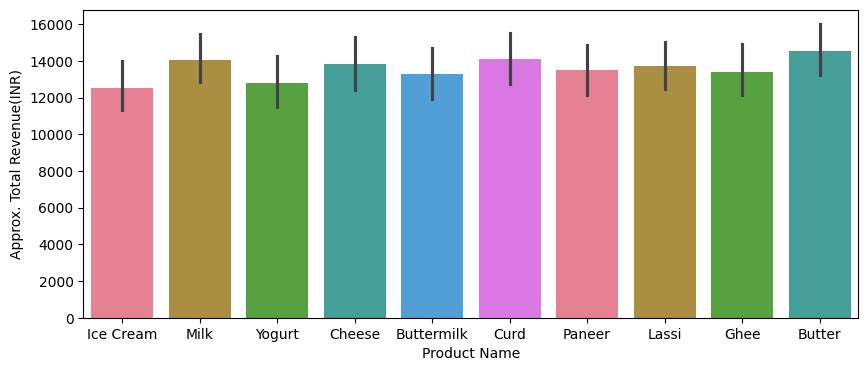

In [ ]:
plt.figure(figsize=(10, 4))
colors = sns.color_palette('husl')[:len(set(df))]
sns.barplot(data = df, x = 'Product Name',y = 'Approx. Total Revenue(INR)',palette=colors)

From above Graphs we can see that the Sales Diastribution Of Each Products

# Que 4 = What is the Highest Sales of Each product from which Year ?

In [ ]:
df.groupby(['Year', 'Product Name'], as_index=False)['Approx. Total Revenue(INR)'].sum().sort_values(by='Approx. Total Revenue(INR)', ascending=False)

,Year,Product Name,Approx. Total Revenue(INR)
13,2020,Curd,1914347.37
0,2019,Butter,1883451.23
29,2021,Yogurt,1762278.09
6,2019,Lassi,1751218.35
33,2022,Curd,1727772.51
17,2020,Milk,1638592.48
1,2019,Buttermilk,1635304.32
19,2020,Yogurt,1618455.48
3,2019,Curd,1615244.56
20,2021,Butter,1597311.51


Text(0.5, 1.0, 'Aggregated Revenue by Year and Product Name')

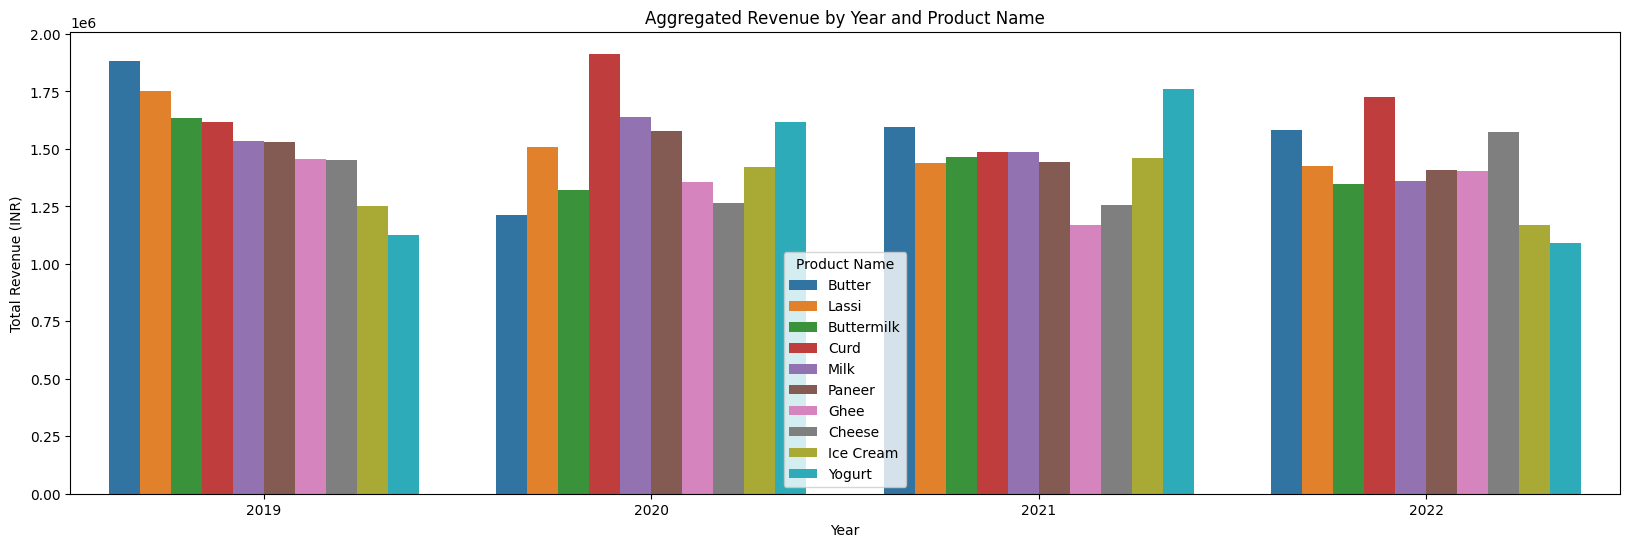

In [ ]:
# Group by 'Year' and 'Product Name' and aggregate the data
agg_df = df.groupby(['Year', 'Product Name'], as_index=False)['Approx. Total Revenue(INR)'].sum().sort_values(by='Approx. Total Revenue(INR)', ascending=False)
plt.figure(figsize=(20, 6))
sns.barplot(data=agg_df, x='Year', y='Approx. Total Revenue(INR)', hue='Product Name')
plt.xlabel('Year')
plt.ylabel('Total Revenue (INR)')
plt.title('Aggregated Revenue by Year and Product Name')

**In 2019 Butter is the Highest Sales Product and 2020 Curd is the Highest Sales Product and 2021 Yogurt is the Highest sales product and 2022 curd is the highest sales product**

# Que 5 = What is the self life of each Amul product ?

In [ ]:
df.loc[df['Brand']=='Amul'].groupby(['Product Name'])['Shelf Life (days)'].unique()

Product Name
Butter        [28, 38, 29, 40, 34, 31, 35, 32, 25, 27, 39, 3...
Buttermilk                        [10, 9, 12, 14, 13, 7, 8, 11]
Cheese        [29, 59, 74, 39, 50, 63, 52, 69, 55, 53, 61, 4...
Curd                                                  [6, 7, 5]
Ghee          [136, 129, 147, 86, 115, 65, 126, 99, 106, 139...
Ice Cream              [24, 25, 26, 27, 29, 22, 23, 28, 21, 30]
Lassi                              [16, 12, 13, 17, 15, 14, 18]
Milk             [22, 28, 1, 29, 25, 26, 2, 30, 24, 23, 21, 27]
Paneer                            [7, 10, 11, 14, 9, 12, 13, 8]
Yogurt                 [28, 26, 27, 24, 23, 30, 25, 21, 29, 22]
Name: Shelf Life (days), dtype: object

**There is the different self life from different states of each product**

#Que6 = Which brand should have highest sales from each year

In [ ]:
df.groupby(['Brand', 'Year'], as_index=False)['Approx. Total Revenue(INR)'].sum()

,Brand,Year,Approx. Total Revenue(INR)
0,Amul,2019,3651973.41
1,Amul,2020,3970046.60
2,Amul,2021,3477036.71
3,Amul,2022,3509807.74
4,Britannia Industries,2019,223305.19
5,Britannia Industries,2020,186494.22
6,Britannia Industries,2021,214708.28
7,Britannia Industries,2022,405014.36
8,Dodla Dairy,2019,670807.40
9,Dodla Dairy,2020,760687.86


<ipython-input-106-473265985b84>:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=agg_df, x='Brand', y='Approx. Total Revenue(INR)', hue='Year', palette=colors)


Text(0.5, 1.0, 'Total Revenue by Brand and Year')

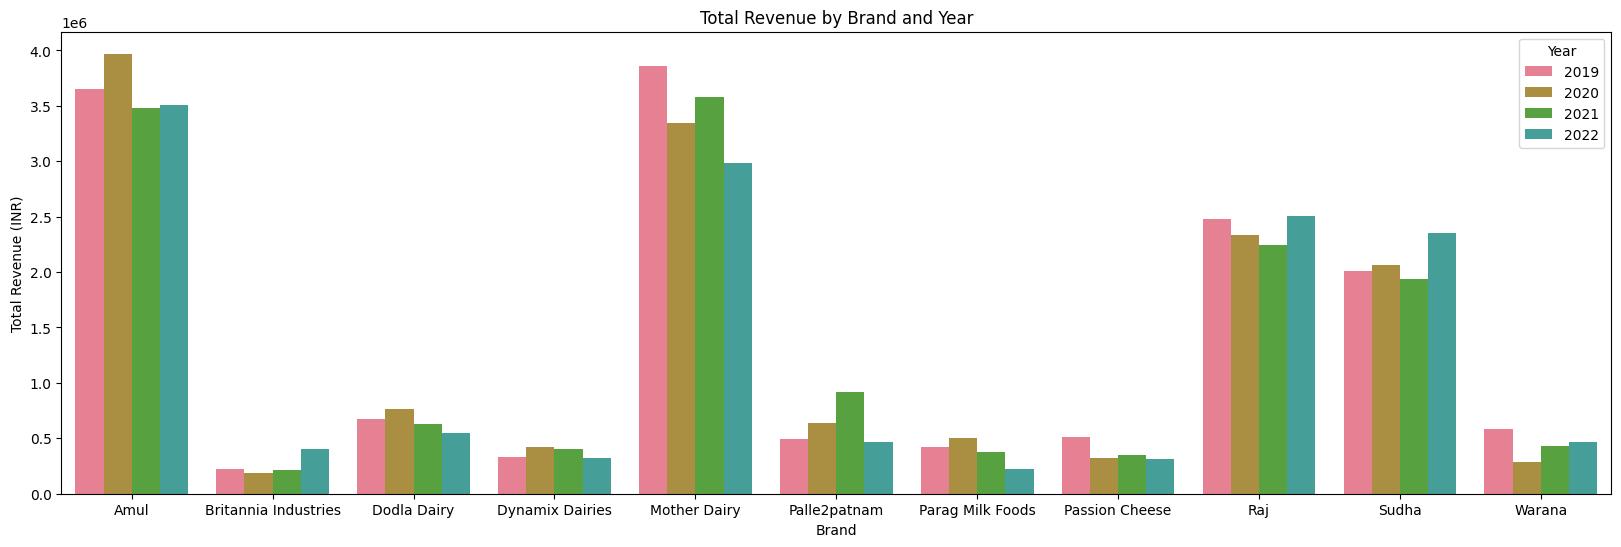

In [ ]:
agg_df = df.groupby(['Brand', 'Year'], as_index=False)['Approx. Total Revenue(INR)'].sum()
plt.figure(figsize=(20, 6))
colors = sns.color_palette('husl')[:len(set(df))]
sns.barplot(data=agg_df, x='Brand', y='Approx. Total Revenue(INR)', hue='Year', palette=colors)
plt.xlabel('Brand')
plt.ylabel('Total Revenue (INR)')
plt.title('Total Revenue by Brand and Year')


**From the above graph we have to see the Amul and Mother Dairy achive highest sales of each years**

# Que 7 = What is the market share of dairy brands ?

<Axes: ylabel='Brand'>

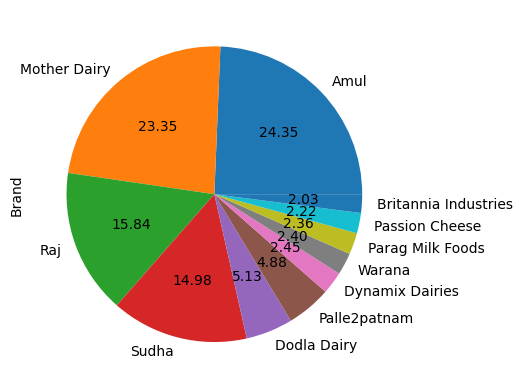

In [ ]:
df['Brand'].value_counts().plot(kind='pie',autopct='%.2f')

**From above Graphs we can see that the highest market cap is Amul is 24.35% and the second one is Mother Dairy is 23.35%**

#Que 8 = Impact of Storage Conditions on Quantity of Available Dairy Products ?

<ipython-input-108-bbb92f9cb73e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(data = df, x = 'Storage Condition', palette=colors)
<ipython-input-108-bbb92f9cb73e>:3: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax =sns.countplot(data = df, x = 'Storage Condition', palette=colors)


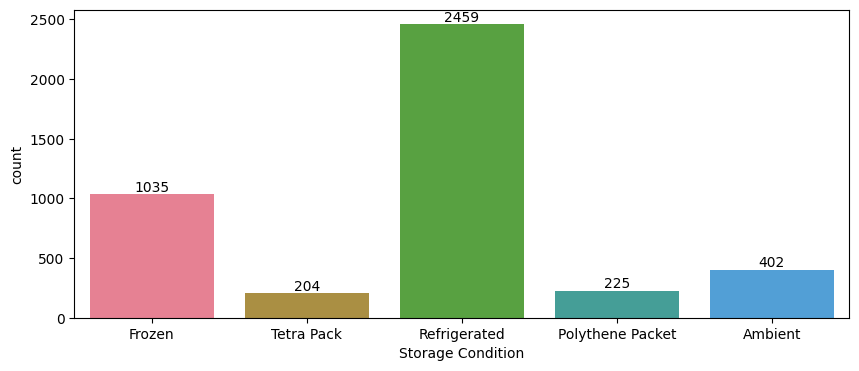

In [ ]:
plt.figure(figsize=(10, 4))
colors = sns.color_palette('husl')[:len(set(df))]
ax =sns.countplot(data = df, x = 'Storage Condition', palette=colors)
for bars in ax.containers:
  ax.bar_label(bars)

**From the above graph we can see that the Impact Of Storage Condition Quantity of AvailableDairy Products**

#Que 9 = Which State should have Highest Customer Present ?

In [ ]:
df.groupby(['Customer Location'],as_index=False)['Approx. Total Revenue(INR)'].sum().sort_values(by='Approx. Total Revenue(INR)',ascending=False)

,Customer Location,Approx. Total Revenue(INR)
1,Chandigarh,6334678.26
2,Delhi,6315810.80
0,Bihar,4504967.19
7,Kerala,3907802.01
14,West Bengal,3669851.99
6,Karnataka,3669819.65
9,Maharashtra,3635633.24
13,Uttar Pradesh,3595655.05
11,Tamil Nadu,3545342.60
3,Gujarat,3517231.57


<ipython-input-110-12c4b9a0207b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(data = df, x = 'Customer Location', palette=colors)
<ipython-input-110-12c4b9a0207b>:3: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax =sns.countplot(data = df, x = 'Customer Location', palette=colors)


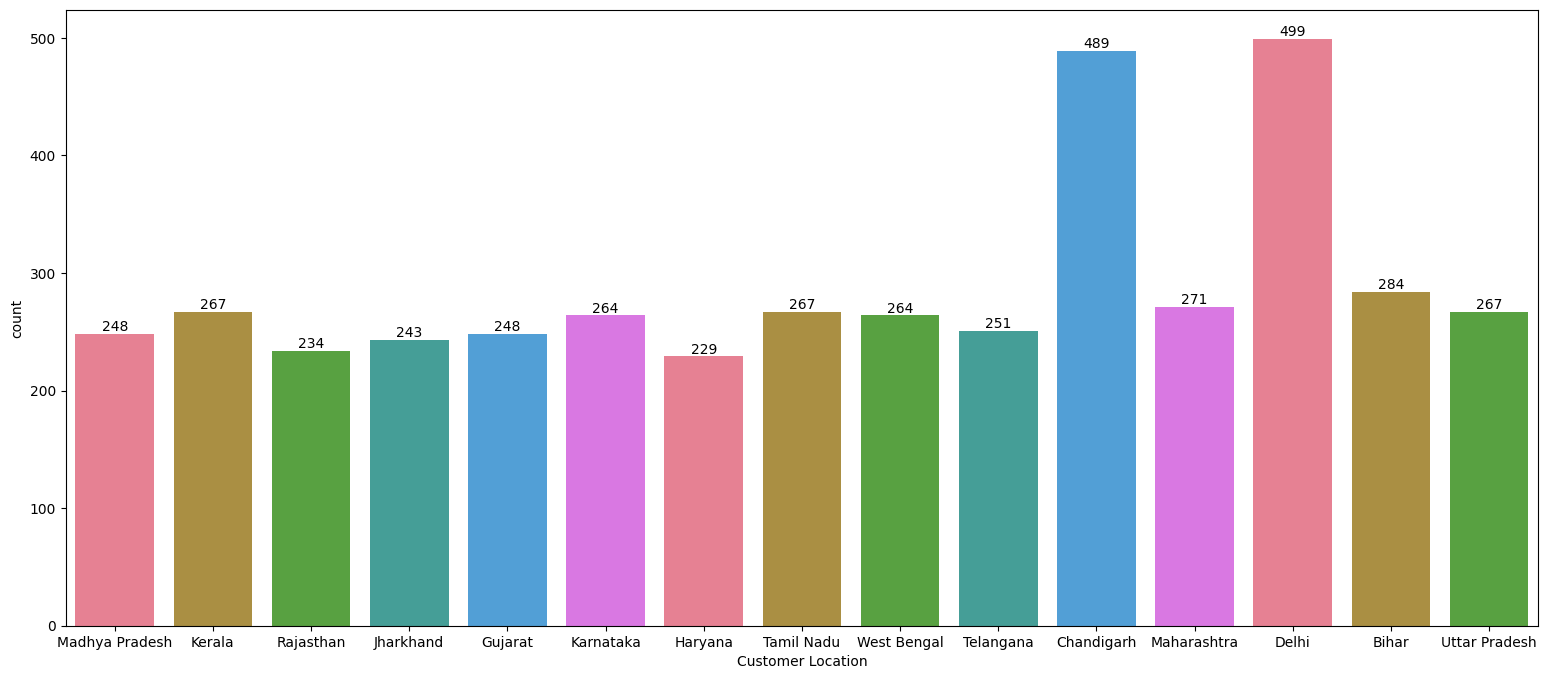

In [ ]:
plt.figure(figsize=(19, 8))
colors = sns.color_palette('husl')[:len(set(df))]
ax =sns.countplot(data = df, x = 'Customer Location', palette=colors)
for bars in ax.containers:
  ax.bar_label(bars)

**from the above graph we can see that the maximum number of Customer present in Chandighar and Delhi**  

#Que 10 =  What is the Different Sales Channel ?

<ipython-input-111-0aa6f0c71d68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(data = df, x = 'Sales Channel', palette=colors)
<ipython-input-111-0aa6f0c71d68>:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax =sns.countplot(data = df, x = 'Sales Channel', palette=colors)


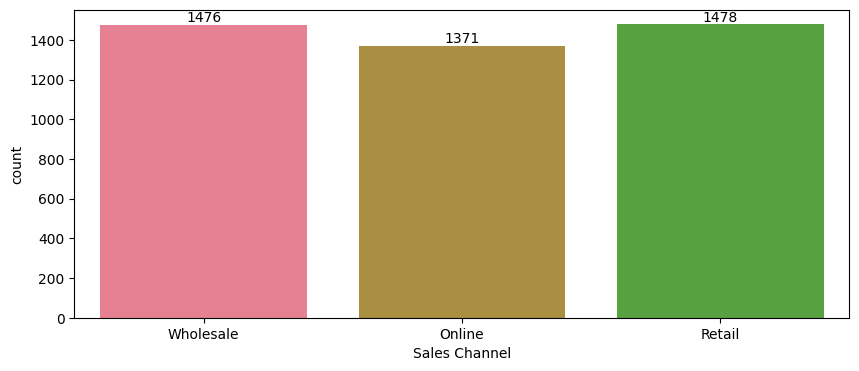

In [ ]:
plt.figure(figsize=(10, 4))
colors = sns.color_palette('husl')[:len(set(df))]
ax =sns.countplot(data = df, x = 'Sales Channel', palette=colors)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: ylabel='Sales Channel'>

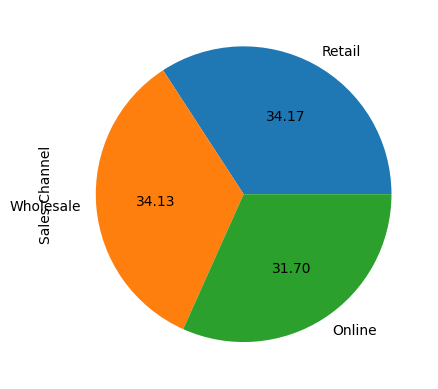

In [ ]:
df['Sales Channel'].value_counts().plot(kind='pie',autopct='%.2f')

*From the above graph we can see that the wholesale and Retail are some equally sales channel but online is the third one*

#Que 11 = Which state has the biggest land area? How many cows are there ?

In [ ]:
df.groupby(['Location']).agg({'Total Land Area (acres)': 'sum', 'Number of Cows': 'sum'}).reset_index()

,Location,Total Land Area (acres),Number of Cows
0,Bihar,123740.88,13214
1,Chandigarh,262496.66,27875
2,Delhi,267502.01,29060
3,Gujarat,131749.37,14074
4,Haryana,121921.57,13463
5,Jharkhand,123127.74,13130
6,Karnataka,129767.96,14515
7,Kerala,128608.08,13792
8,Madhya Pradesh,135883.88,14643
9,Maharashtra,124371.52,14491


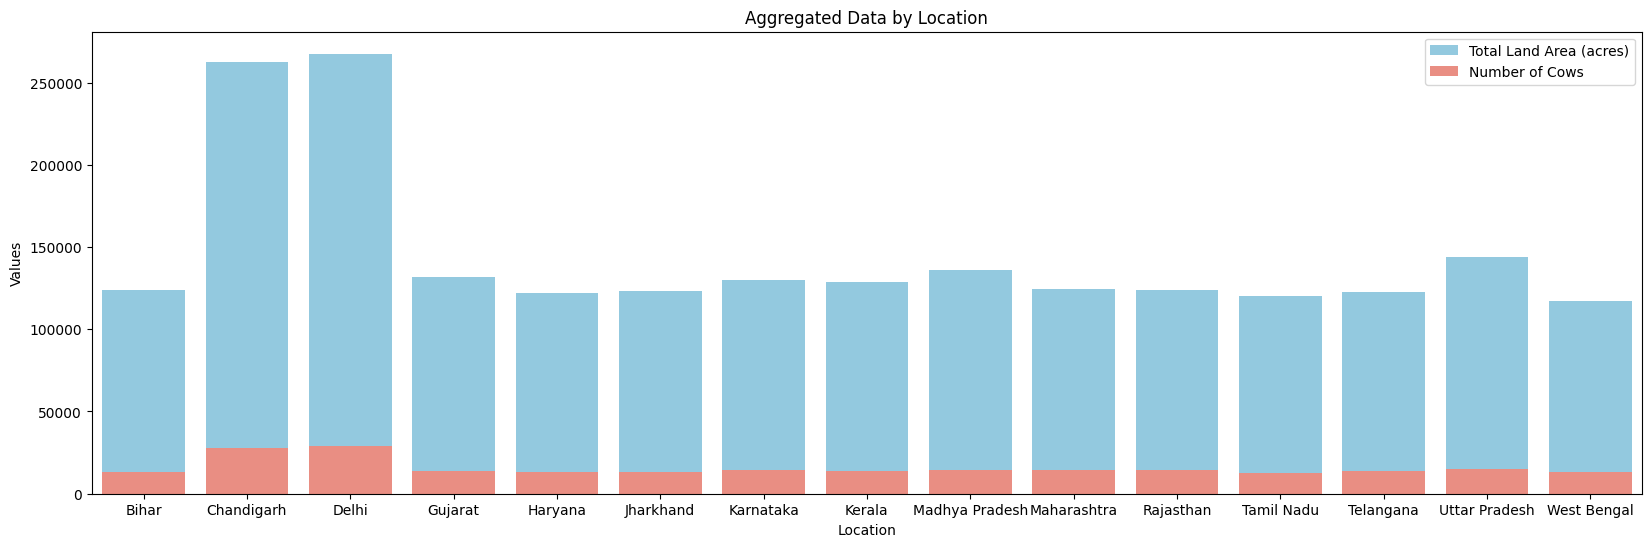

In [ ]:
gg_df = df.groupby(['Location']).agg({'Total Land Area (acres)': 'sum', 'Number of Cows': 'sum'}).reset_index()

# Set the figure size
plt.figure(figsize=(20, 6))  # Width: 10 inches, Height: 6 inches

# Create a bar plot
sns.barplot(data=gg_df, x='Location', y='Total Land Area (acres)', color='skyblue', label='Total Land Area (acres)')
sns.barplot(data=gg_df, x='Location', y='Number of Cows', color='salmon', label='Number of Cows')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Values')
plt.title('Aggregated Data by Location')
plt.legend()

**From the above graph we can see that the group by on the basis of Location and sum of Total Land Area (acres) and Number of Cows Include All Brands**

#Que 12 =What is the Customer Bhaviour of Each Sales Channels from Different States ?

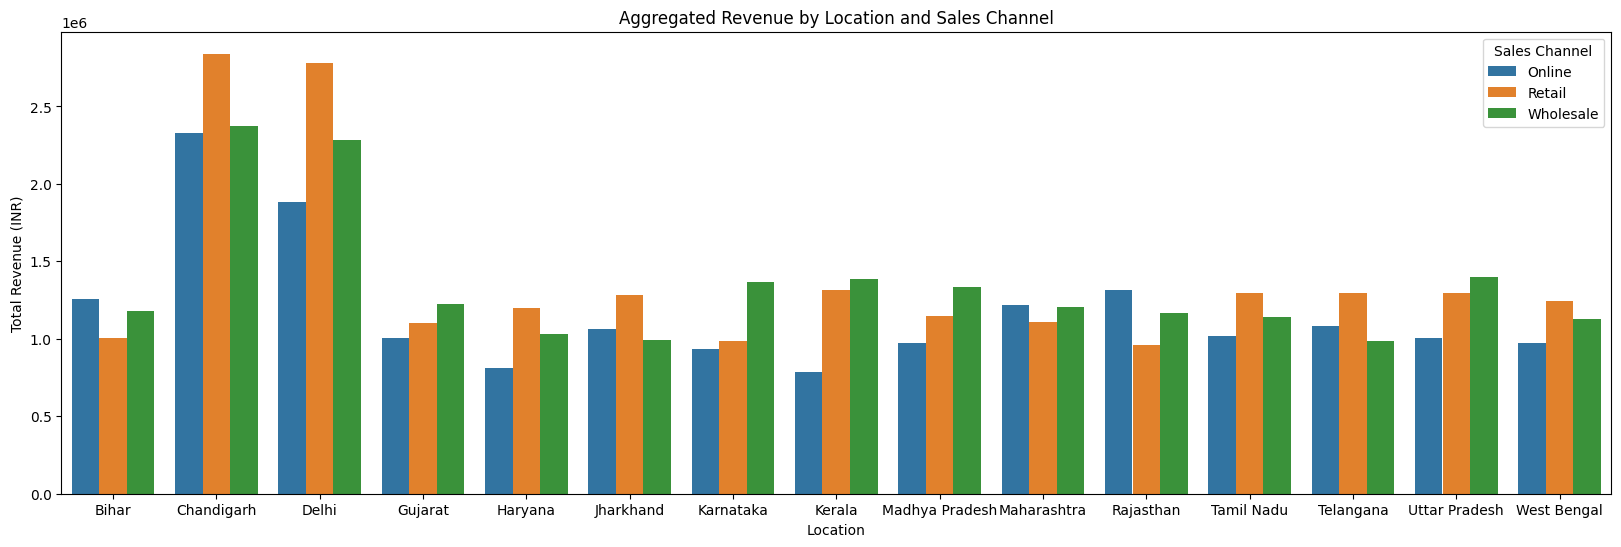

In [ ]:
agg_df = df.groupby(['Location', 'Sales Channel'])['Approx. Total Revenue(INR)'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(20, 6))  # Width, Height in inches

# Create a bar plot
sns.barplot(data=agg_df, x='Location', y='Approx. Total Revenue(INR)', hue='Sales Channel')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Total Revenue (INR)')
plt.title('Aggregated Revenue by Location and Sales Channel')

# Show the plot
plt.show()

**From the above Graph we can see that the Customer preferences and buying behavior based on location and sales channels**

# Que 13 = What is the Inventory management of each Dairy product

<ipython-input-116-0058273e4590>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_df, x='Product Name', y='Quantity in Stock (liters/kg)', palette='husl')


Text(0.5, 1.0, 'Total Quantity in Stock by Product Name')

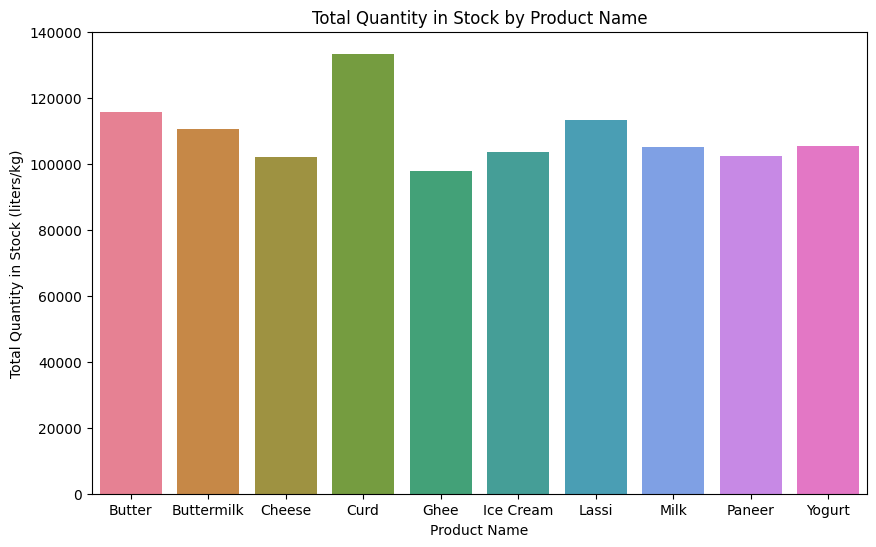

In [ ]:
agg_df = df.groupby(['Product Name'])['Quantity in Stock (liters/kg)'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=agg_df, x='Product Name', y='Quantity in Stock (liters/kg)', palette='husl')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity in Stock (liters/kg)')
plt.title('Total Quantity in Stock by Product Name')

**From the above graph we have to see that the inventry management of each Dairy product**

# Que 14 = let’s plot the heatmap and see the correlation

<ipython-input-117-86d43ba96ebd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=df.corr()


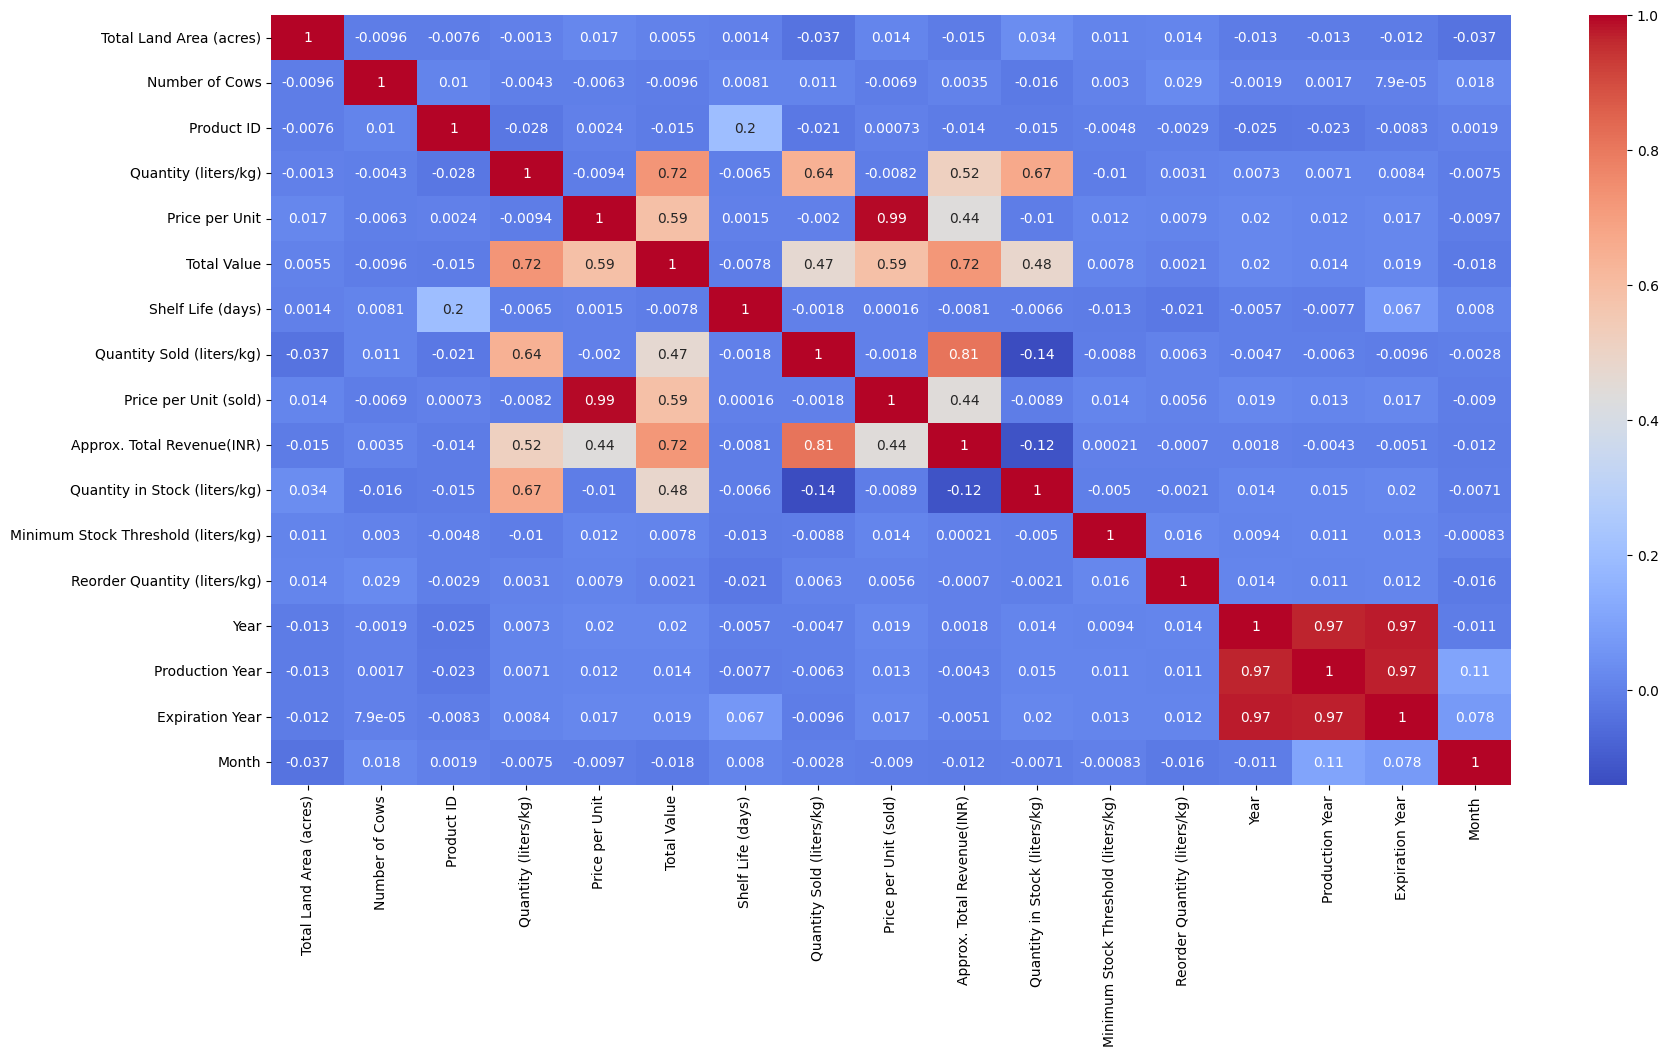

In [ ]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True);

# **Conclusion**


---

That's it! We reached the end of our exercise.
## We learned that :

 * we have see that the chandighar and Delhi is highest demand of dairy products because maximum customer of dairy industry is present in those states


* we have see that the milk, curd, Butter, Lassi, Yogurt is highest sales of each dairy industry brand because it is a daily use product that why it record highest sales

  
* Every farm size group is equally contribution of dairy industry

* According to this data our Dairy industry highest market own by Amul and Mother Dairy there is a very less difference Amul stake is 24.35% and mother dairy is 23.35% market stake over all 47.7% stake holder


* self life of each dairy product is different from different states because storage condition is impact of each and every product

* the maximum number of Customer present in Chandighar and Delhi and over all Chandighar give 6334678.26 (INR) and Delhi give 6315810.80 (INR) that why we are over dependent of these two states


* we should expend our dairy industrial plants from different states and reduce our dependency of these two states


* we have see the sales channel is a very less difference about Retail and wholesalei in Retail is a highest market cap is 34.17% and wholesale is 34.13% and the last one is online 31.07%


* the Customer preferences and buying behavior based on location and sales channels


* the highest land area of dairy industry is located in chandighar and delhi because highest customer should be present in chandighar and delhi states


* curd is a highest inventry management in comparison of other products
